Creating datasets 

In [34]:
import matplotlib.pyplot as plt
import numpy as np
#for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [12]:
samples = 100
positions = np.arange(0,samples)
sin_set = np.sin(positions*(3/len(positions)))*samples
data_sets = {
    'Linear': (2*positions).reshape((-1,1)),
    'Sorted': (2*positions + np.random.randint(-50,50,samples) ).reshape((-1,1)),#it is not quite sorted PROBLEM
    'Sin': sin_set.reshape((-1,1))
}

Model that creates histograms for Regression models  

In [20]:
def histogram (test, predictions, data_set):
    fig, ax = plt.subplots()
    titles = ('0', '1', '2', '3', '4', '5-15', '15-50', '>=50')
    y_positions = np.arange(len(titles))
    performance = [0] * 8

    for i in range(len(test)):
        predictions[i] = round(predictions[i])
        j = 7
        if predictions[i] == test[i]:
            j=0
        elif predictions[i] + 1 == test[i] or predictions[i] - 1 == test[i]:
            j = 1
        elif predictions[i] + 2 == test[i] or predictions[i] - 2 == test[i]:
            j = 2
        elif predictions[i] + 3 == test[i] or predictions[i] - 3 == test[i]:
            j = 3
        elif predictions[i] + 4 == test[i] or predictions[i] - 4 == test[i]:
            j = 4
        elif predictions[i] + 15 > test[i] and predictions[i] - 15 < test[i]:
            j = 5
        elif predictions[i] + 50 > test[i] and predictions[i] - 50 < test[i]:
            j = 6

        performance[j] += 1

    ax.barh(y_positions, performance)
    ax.set_yticks(y_positions, labels=titles)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Sum')
    ax.set_title('Output accuracy '+ data_set + ' data set' )
    

Linear Regression

In [21]:
def linear_reg(x_train, x_test, y_train):
    linear_reg_model = LinearRegression().fit(x_train, y_train)
    y_predictions = linear_reg_model.predict(x_test)
    return linear_reg_model

In [22]:
testingSize = 0.2

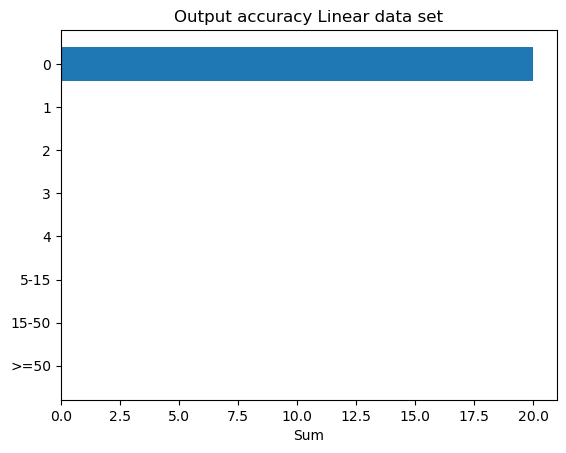

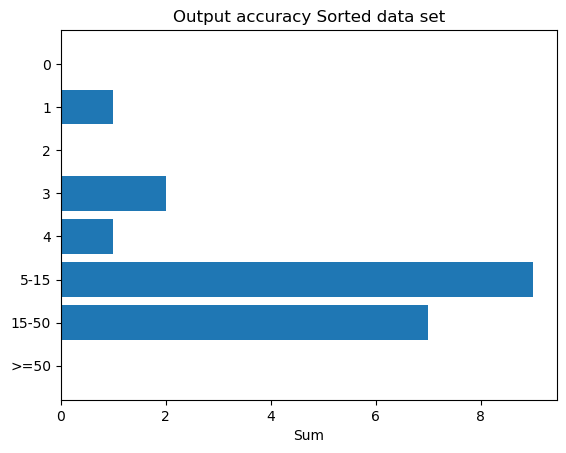

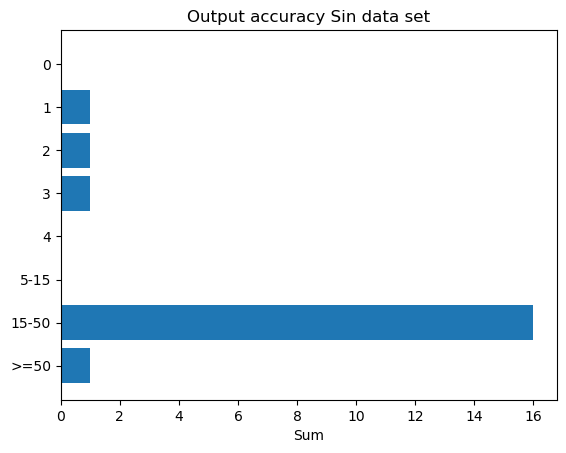

In [23]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    #Linear reg
    prediction_model = linear_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test), i)
plt.show()

Polynomial Regression 

In [30]:
def plynomial_reg(x_train, x_test, y_train):
    polynomial = PolynomialFeatures(degree=4)
    poly_features = polynomial.fit_transform(x_train)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    poly_test = polynomial.fit_transform(x_test)

    return poly_test, poly_reg_model

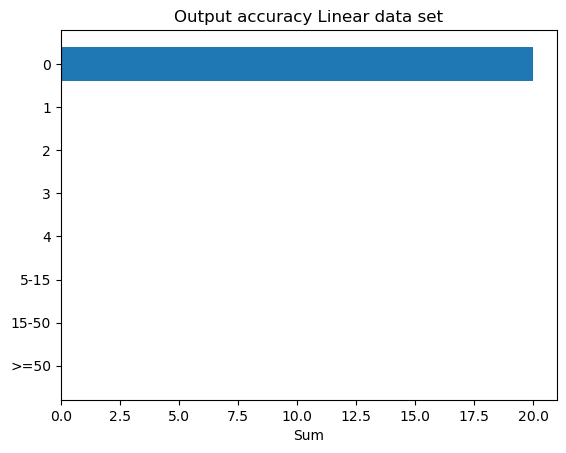

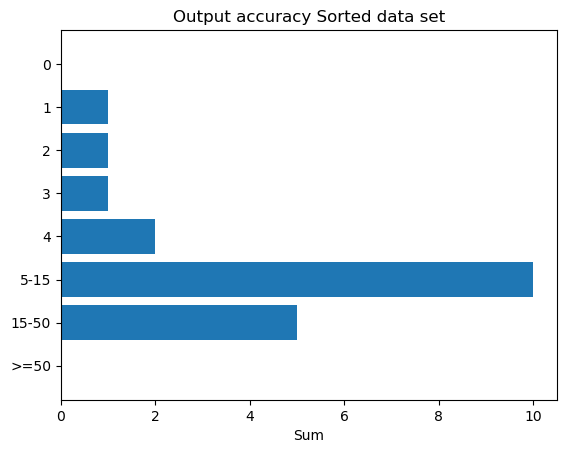

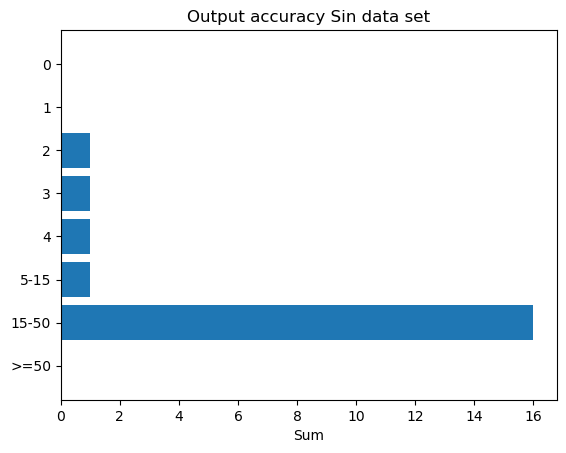

In [32]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    test_set ,prediction_model = plynomial_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(test_set), i)
plt.show()

Nearest Neighbors Regression 

In [24]:
def nearest_neighbors_reg(x_train, x_test, y_train):
    knn = neighbors.KNeighborsRegressor(3, weights="distance")
    knn.fit(x_train, y_train)
    #y_predictions = knn.predict(x_test)
    return knn

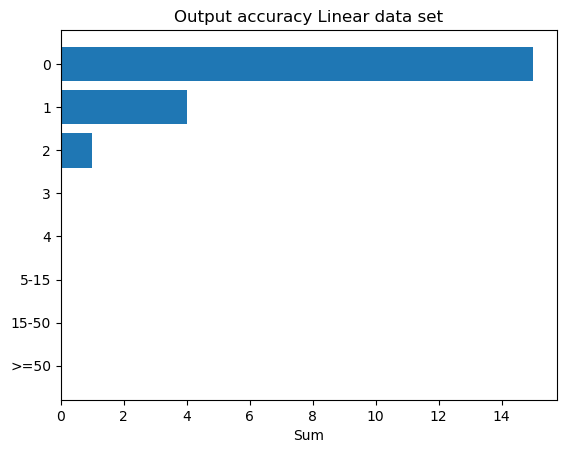

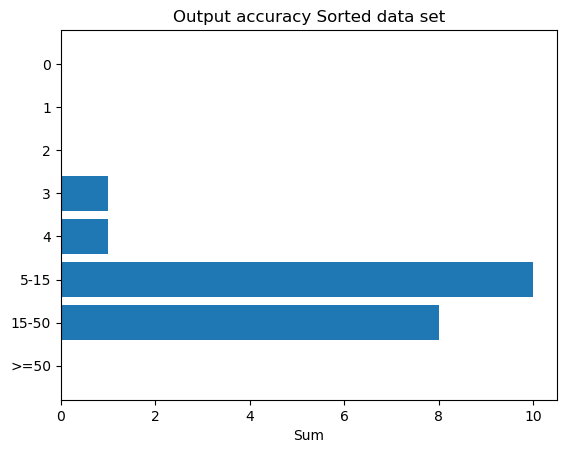

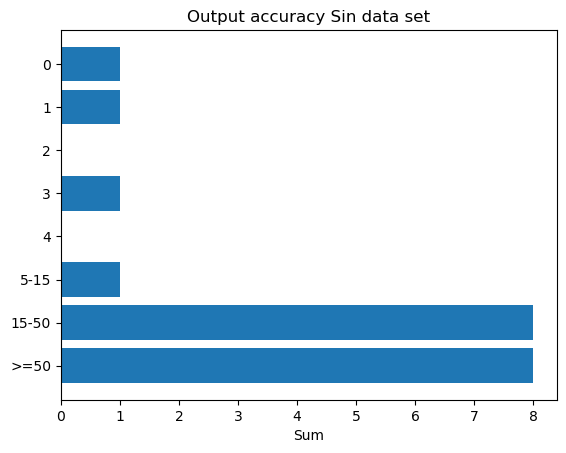

In [26]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    prediction_model = nearest_neighbors_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test), i)
plt.show()

Decision Tree Regression 

In [28]:
def decision_tree_reg(x_train, x_test, y_train):
    d_tree = tree.DecisionTreeRegressor()
    d_tree.fit(x_train, y_train)
    #y_predictions = d_tree.predict(x_test)
    return d_tree

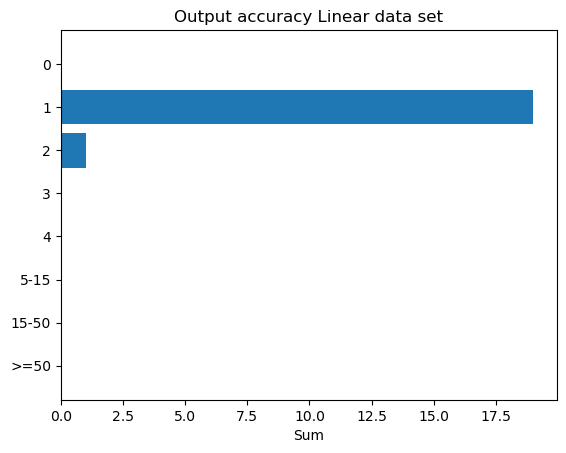

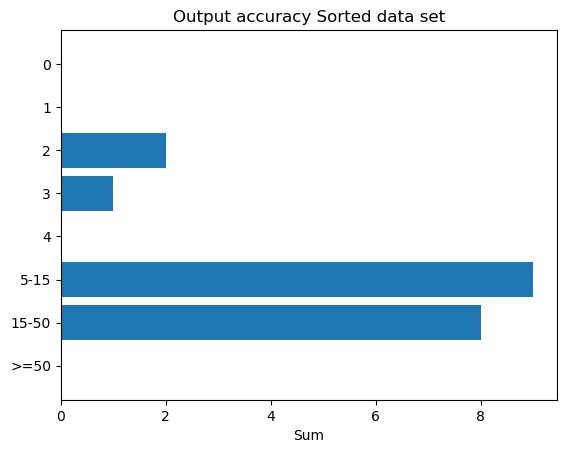

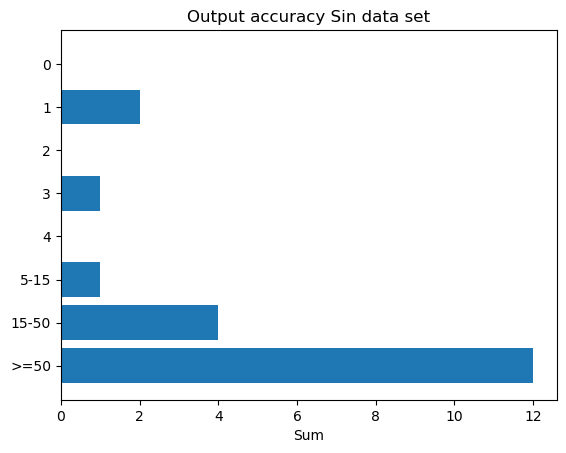

In [35]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    prediction_model = decision_tree_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test),i)
plt.show()

Gaussian Regressionodel_model
    

In [36]:
def gaussian_reg(x_train, x_test, y_train):
    krnl = RBF(length_scale=1.0, length_scale_bounds="fixed")
    gaussian_model = GaussianProcessRegressor(kernel=krnl,normalize_y=False, random_state=1, alpha=0.001)
    gaussian_model.fit(x_train, y_train)
    return gaussian_model

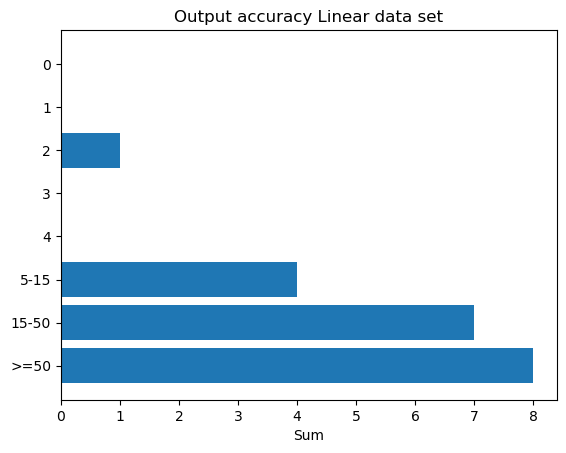

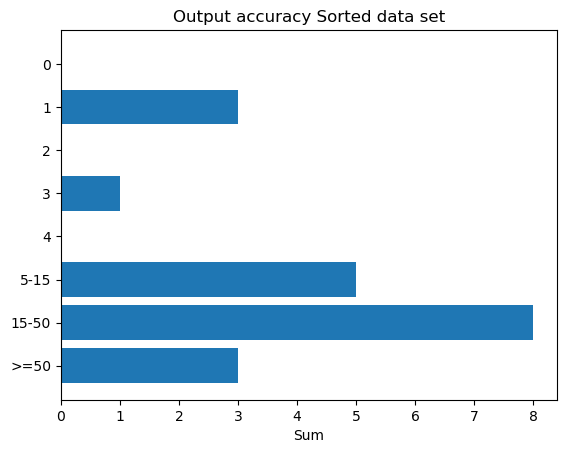

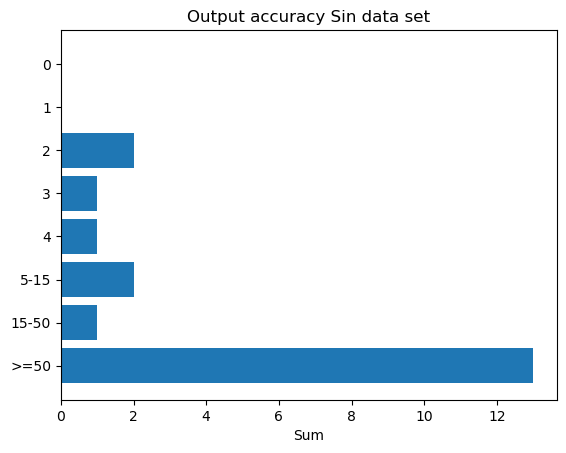

In [37]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    prediction_model = gaussian_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test),i)
plt.show()